In [ ]:
#| hide
from LensCalcPy.pbh import *
from LensCalcPy.ffp import *
from LensCalcPy.utils import *
from LensCalcPy.stats import *
from LensCalcPy.parameters import *
from pathos.multiprocessing import ProcessingPool as Pool
import functools
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

# LensCalcPy

> Calculate Microlensing Observables

<img src="assets/logo.png" alt="logo" width="200"/>

## Install

```sh
pip install LensCalcPy
```

## How to use

This package is primarily used to calculate the expected rate of microlensing events for a given population of lenses. At its core, the package is designed to compute integrals of the form:

$\frac{d\Gamma}{dM\,dd_L\,d\hat{t}\,du_\text{min}} =  
     \frac{2}{\sqrt{u_T^2 - u_{\rm{min}}^2}} \frac{v_T^4}{v_c^2} \exp \Big[ -\frac{v_T^2}{v_c^2}\Big] n(d_L) f(M) \varepsilon(\hat{t}),$

which is the differential rate for a given line of sight over $d_L$, mass function $f(M)$, event duration $\hat{t}$, and minimum impact parameter $u_\text{min}$. In practice, the user can define the parameters of their survey (Line of sight, cadence, observation duration) and compute observables such as the distribution of crossing times $t_E$, total expected events, etc.

The full documentation can be found [here](http://nolan-smyth.com/LensCalcPy/). The source code, located in [nbs](https://github.com/NolanSmyth/LensCalcPy/tree/main/nbs), is intended to be easily interacrtable and modularizable, so adding functionality is straightforward. For real-world examples, see the notebooks in the [examples](https://github.com/NolanSmyth/LensCalcPy/tree/main/examples) folder. Below are some minimal examples for PBH (Primordial Black Hole) lenses and UBO (Unbound Objects) lenses. Here, the line of sight is towards M31, the Andromeda galaxy.

We can calculate the distribution of crossing times for a given PBH population

In [ ]:
f_pbh = 1 # fraction of dark matter in PBHs

ts = np.logspace(-2, 1, 20)
pbhs = [Pbh(10**(i), f_pbh, l=l, b=b) for i in np.linspace(-9, -7, 3)]
result = np.zeros((len(pbhs), len(ts)))
for i, pbh in enumerate(pbhs):
    result[i, :] = pbh.compute_differential_rate(ts)

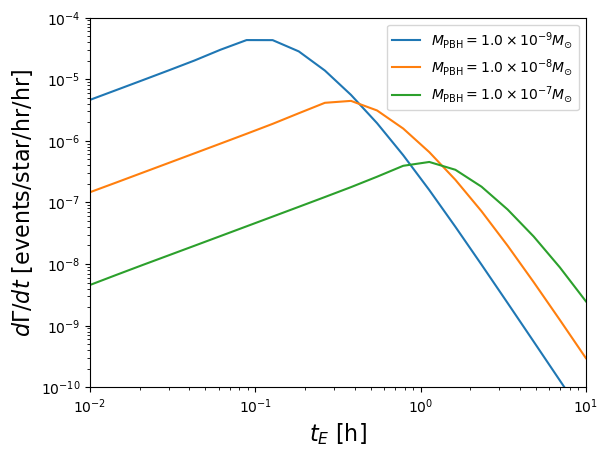

In [ ]:
for i, pbh in enumerate(pbhs):
    plt.loglog(ts, result[i], label=r"$M_{\rm{PBH}} = $" + scientific_format(pbh.mass,0) + "$M_{\odot}$")

plt.xlabel(r"$t_E$ [h]", fontsize=16)
plt.ylabel(r"$d\Gamma/dt$ [events/star/hr/hr]", fontsize=16)
plt.xlim(1e-2, 1e1)
plt.ylim(1e-10, 1e-4)

plt.legend()
plt.show()


Similarly, we can calculate the distribution of crossing times for an FFP population with mass function $\frac{dM}{d \log(M)} \propto M^{-p}$

In [ ]:
p = 1
fp = Ffp(p, l=l, b=b)

In [ ]:
def differential_rate_mw_mass(m, tcad = 0.07, tobs= 3, finite=True):
    return fp.differential_rate_mw_mass(m, tcad=tcad, tobs=tobs, finite=finite)

m_arr = np.logspace(-15, -3, 20)
with Pool() as pool:
    func = functools.partial(differential_rate_mw_mass, tcad=0.07, tobs=3, finite=True)
    diff_rates  = np.array(list(tqdm(pool.imap(func, m_arr), total=len(m_arr))))

100%|██████████| 20/20 [00:08<00:00,  2.29it/s]


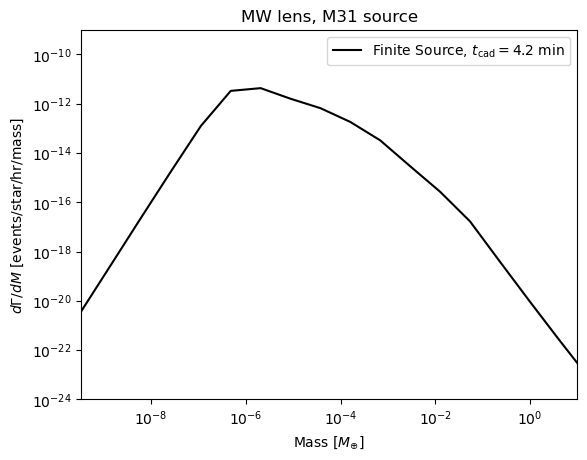

In [ ]:
plt.loglog(m_arr/3e-6, diff_rates, label=r'Finite Source, $t_{\rm{cad}} = 4.2 ~\rm{min}$', color='k')

plt.ylim(1e-24, 1e-9)
plt.xlim(np.min(m_arr)/3e-6, 1e1)

plt.xlabel("Mass [$M_{\oplus}$]")
plt.ylabel(r"$d\Gamma/dM$ [events/star/hr/mass]")
plt.title('MW lens, M31 source')
plt.legend()
plt.show()